# Statystyka matematyczna - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu:
Członkowie:

---

# Zestaw zadań 7: Estymacja nieparametryczna

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KernelDensity

In [ ]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Dane do zadań

W celu wygenerowania danych wykonaj poniższą komórkę.

In [2]:
# Dane do testów 1
sample = pd.DataFrame(data=np.concatenate([sp.stats.norm.rvs(loc=4, scale=0.2, size=45, random_state=7), sp.stats.norm.rvs(loc=5.5, scale=0.4, size=85, random_state=2159)]), columns=["X"])
sample.head()

,X
0,4.338105
1,3.906813
2,4.006564
3,4.081503
4,3.842215


### Zadanie 1: Histogram [5 pkt]

#### a) Przygotowanie wykresów

Korzystając z funkcji `seaborn.histplot()`przygotuj histogramy częstości zestawu danych zawartego w zmiennej `sample`.

Wykresy zestaw na pojedynczej figurze (2x3 pola na wykres). Przygotowując figurę kieruj się wytycznymi z początku notatnika. Podczas wykonywania kolejnych histogramów:
 - nie ustawiaj żadnych wartość określających podział na przedziały oraz granice przedziałów,
 - ustaw wyłącznie liczbę przedziałów na 20,
 - ustaw wyłącznie szerokość przedziałów na 0.3,
 - ustaw granice przedziałów od 2 do 8 z krokiem 0.05,
 - ustaw granice przedziałów od 2 do 8 z krokiem 0.15,
 - ustaw granice przedziałów od 2 do 8 z krokiem 0.4.
 
Do każdego z wykresów dodaj wizualną reprezentację zestawu danych w postaci zbioru symboli (| lub +) zlokalizowanych poniżej histogramu. Ustaw identyczne zakresy osi dla wszystkich wykresów.

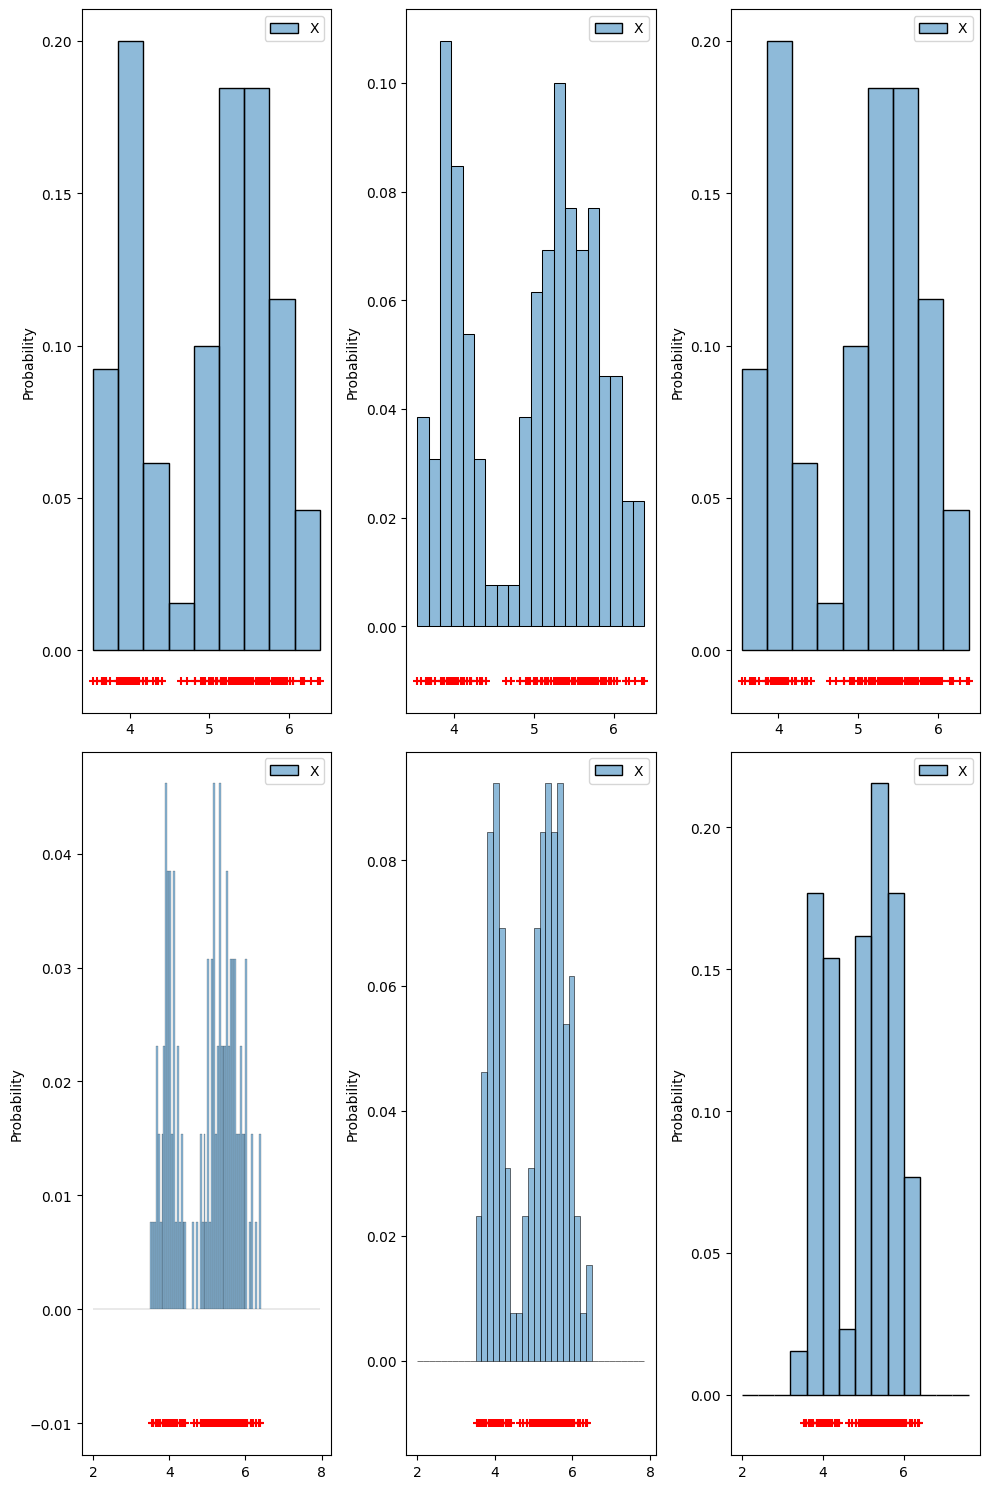

In [34]:

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 15))
sns.histplot(sample, stat='probability', ax=ax[0,0])
sns.histplot(sample, stat='probability', bins=20, ax=ax[0,1])
sns.histplot(sample, stat='probability', binwidth=0.3, ax=ax[0,2])
sns.histplot(sample, stat='probability', bins=np.arange(2, 8, 0.05), ax=ax[1,0])
sns.histplot(sample, stat='probability', bins=np.arange(2, 8, 0.15), ax=ax[1,1])
sns.histplot(sample, stat='probability', bins=np.arange(2, 8, 0.4), ax=ax[1,2])
for ix, ax2 in zip(range(1, 7), ax.flatten()):
  ax2.scatter(sample, np.full_like(sample, -0.01), marker='+', color='red')
plt.tight_layout()
plt.show()
  
  

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
sns.histplot(data = sample, stat= 'probability', ax = ax[0,0]) # histogramy cze
sns.histplot(data = sample, stat= 'probability', bins=20, ax = ax[0,1])
sns.histplot(data = sample, stat= 'probability', binwidth=0.3, ax = ax[0,2])
sns.histplot(data = sample, stat= 'probability', bins=np.arange(2, 8, 0.05), ax = ax[1,0])
sns.histplot(data = sample, stat= 'probability',  bins=np.arange(2, 8, 0.15), ax = ax[1, 1])
sns.histplot(data = sample, stat= 'probability', bins=np.arange(2, 8, 0.4), ax = ax[1, 2])
print(list(zip(range(1, 7), ax.flatten())))
for ix, ax2 in zip(range(1, 7), ax.flatten()):
  ax2.scatter(sample, np.full_like(sample, -0.01), marker='+', color='red')
plt.setp(ax, xlim=[3, 7], ylim=[-0.02, 0.25])
fig.suptitle('Hist')
plt.tight_layout()
plt.show()


### Zadanie 2: Estymacja funkcją jądrową [16 pkt]

#### a) Estymacji funkcjami jądrowymi od podstaw

Przygotuj funkcję `simple_kde_estimation()`, która będzie dokonywała estymacji nieparametrycznej metodą funkcji jądrowych z wykorzystaniem jądra w postaci rozkładu normalnego o odchyleniu normalnym $\sigma$ zgodnie z informacjami zawartymi w docstring funkcji oraz schematem z załączonego do notatnika zestawu wzorów.

Poza zwracaniem danych określonych w docstring funkcji powinna ona generować wykres zawierający wyestymowaną funkcję (wykres liniowy z wypełnionym polem pod krzywą) oraz dodaną wizualną reprezentacją zestawu danych w postaci zbioru symboli (| lub +) zlokalizowanych poniżej wykresu.

Uwagi do wykonania zadania:
 - Punkty estymacji wygeneruj za pomocą funkcji `numpy.linspace()` lub `numpy.arange()`.
 - Wartości gęstości prawdopodobieństwa oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.norm`.
 - Przygotowując figurę kieruj się wytycznymi z początku notatnika.

In [70]:
from scipy.stats import norm 
def simple_kde_estimation(data, estimation_points, sigma):
  x_min = np.min(data['X'])
  x_max = np.max(data['X'])
  x_lin = np.linspace(x_min - 3*sigma, x_max + 3 * sigma, estimation_points)
  pdf_val = np.zeros_like(x_lin)
  for i in range(len(x_lin)):
    pdf_val[i] = sum(norm.pdf(data, loc = x_lin[i], scale=sigma))
  d = x_lin[1] - x_lin[0]
  area = d * sum(pdf_val)
  estimate = pdf_val / area
  df = pd.DataFrame({'X':x_lin, 'KDE':estimate})
  plt.plot(x_lin, estimate, color='red')
  plt.fill_between(x_lin, 0, estimate, color='blue', alpha=0.5)
  plt.scatter(data, np.full_like(data, -0.01), marker='+', color='red')
  plt.show()
  return df









[[5.29533321e-11]
 [1.77848406e-05]
 [1.41732271e-06]
 [1.79920958e-07]
 [8.01376213e-05]
 [1.66853516e-06]
 [1.69482565e-06]
 [3.87723668e-03]
 [4.62333728e-09]
 [5.88329636e-08]
 [3.78926217e-05]
 [4.11796243e-06]
 [1.02594145e-07]
 [6.49383404e-06]
 [5.91293125e-06]
 [1.27680333e-03]
 [7.70189740e-08]
 [8.69425289e-07]
 [3.80517521e-07]
 [1.68660986e-03]
 [6.98644786e-11]
 [7.36966352e-07]
 [1.21247761e-05]
 [4.70884135e-12]
 [2.14225135e-06]
 [1.26431197e-03]
 [1.32465800e-05]
 [2.21592421e-02]
 [3.78282365e-09]
 [1.39935097e-05]
 [6.49771572e-05]
 [3.26732244e-09]
 [2.67379556e-03]
 [8.61220485e-08]
 [1.10395921e-02]
 [4.49410382e-05]
 [4.76321433e-04]
 [2.54247456e-10]
 [3.11465916e-11]
 [9.12172232e-06]
 [1.38897119e-08]
 [4.29950061e-06]
 [7.11784067e-08]
 [6.80831683e-05]
 [3.28754452e-03]
 [2.17065847e-25]
 [3.78149659e-24]
 [2.88226324e-44]
 [9.96988327e-50]
 [1.00363766e-31]
 [1.26226944e-42]
 [1.31688490e-19]
 [9.28204319e-31]
 [1.06303052e-57]
 [3.29515165e-42]
 [2.247067

C:\Users\marci\AppData\Local\Temp\ipykernel_11088\1244089518.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pdf_val[i] = sum(norm.pdf(data, loc = x_lin[i], scale=sigma))


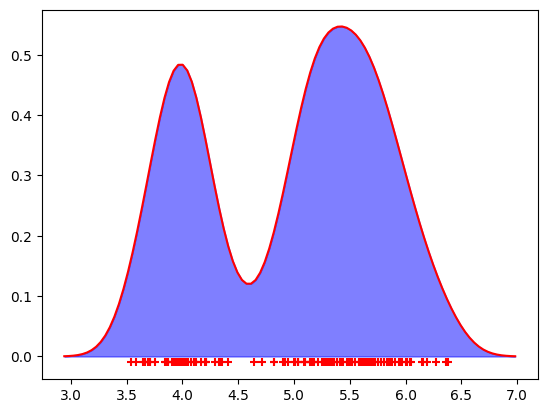

[[1.04168824e-06]
 [3.23792884e-04]
 [9.82667487e-05]
 [3.80323528e-05]
 [6.71127074e-04]
 [1.06013136e-04]
 [1.06787368e-04]
 [4.84248024e-03]
 [7.34933874e-06]
 [2.29118306e-05]
 [4.66040518e-04]
 [1.61759042e-04]
 [2.94640919e-05]
 [2.00501610e-04]
 [1.91818944e-04]
 [2.69994453e-03]
 [2.58766257e-05]
 [7.83519502e-05]
 [5.35582085e-05]
 [3.12041267e-03]
 [1.17421448e-06]
 [7.25926537e-05]
 [2.69648612e-04]
 [3.68586688e-07]
 [1.19107813e-04]
 [2.68622843e-03]
 [2.81266590e-04]
 [1.26624240e-02]
 [6.72461816e-06]
 [2.88725736e-04]
 [6.05717975e-04]
 [6.30275236e-06]
 [3.97462518e-03]
 [2.72182607e-05]
 [8.55593400e-03]
 [5.06215581e-04]
 [1.62956036e-03]
 [2.05659140e-06]
 [8.28599948e-07]
 [2.35516385e-04]
 [1.19866062e-05]
 [1.65074014e-04]
 [2.49702293e-05]
 [6.19688505e-04]
 [4.43477370e-03]
 [1.33510876e-12]
 [4.13894906e-12]
 [7.06428090e-20]
 [6.19130458e-22]
 [4.43983724e-15]
 [2.95612951e-19]
 [2.72997834e-10]
 [1.05293168e-14]
 [6.52346146e-25]
 [4.25415562e-19]
 [2.207737

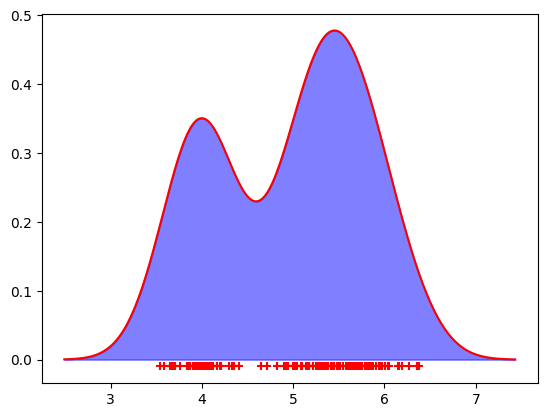

In [72]:
# Komórka testowa
test_results_1 = simple_kde_estimation(sample, estimation_points=100, sigma=0.2)
assert type(test_results_1) == pd.DataFrame
assert test_results_1.shape == (100, 2)
assert list(test_results_1.columns) == ['X', 'KDE']
assert np.all(np.isclose(test_results_1.min().values, [2.94233698e+00, 3.32813073e-04]))
assert np.all(np.isclose(test_results_1.max().values, [6.98176057, 0.54688772]))
assert np.all(np.isclose(test_results_1.mean().values, [4.96204877, 0.24508447]))

test_results_2 = simple_kde_estimation(sample, estimation_points=250, sigma=0.35)
assert type(test_results_2) == pd.DataFrame
assert test_results_2.shape == (250, 2)
assert list(test_results_2.columns) == ['X', 'KDE']
assert np.all(np.isclose(test_results_2.min().values, [2.49233698e+00, 2.69768435e-04]))
assert np.all(np.isclose(test_results_2.max().values, [7.43176057, 0.47782523]))
assert np.all(np.isclose(test_results_2.mean().values, [4.96204877, 0.20164296]))

#### b) Dedykowane funkcje

Korzystając z klasy `KernelDensity` wchodzącej w skład pakietu scikit-learn dokonaj estymymacji rozkładu zestawu danych zawartego w zmiennej `sample`.

Wyniki estymacji przedstaw w postaci wykresów zawierających wyestymowaną funkcję (wykres liniowy z wypełnionym polem pod krzywą) oraz dodaną wizualną reprezentacją zestawu danych w postaci pionowych kresek zlokalizowanych poniżej wykresu.

Wykresy zestaw na dwóch figurach (2x3 pola na wykres). Przygotowując figury kieruj się wytycznymi z początku notatnika. Podczas wykonywania wykresów:
 - Figura 1:
     - na każdym z wykresów przedstaw wynik estymacji z wykorzystaniem innego jądra funkcji,
     - ustaw wartość parametru odpowiadającego za szerokość jądra funkcji na 0.1,
     - ustaw identyczne zakresy osi dla wszystkich wykresów.
 - Figura 2:
     - na każdym z wykresów przedstaw wynik estymacji z wykorzystaniem innego jądra funkcji,
     - ustaw wartość parametru odpowiadającego za szerokość jądra funkcji tak, aby wynik pracy funkcji dobrze oddawał charakter rozkładu populacji z której została pobrana próba losowa,
     - ustaw identyczne zakresy osi dla wszystkich wykresów. 

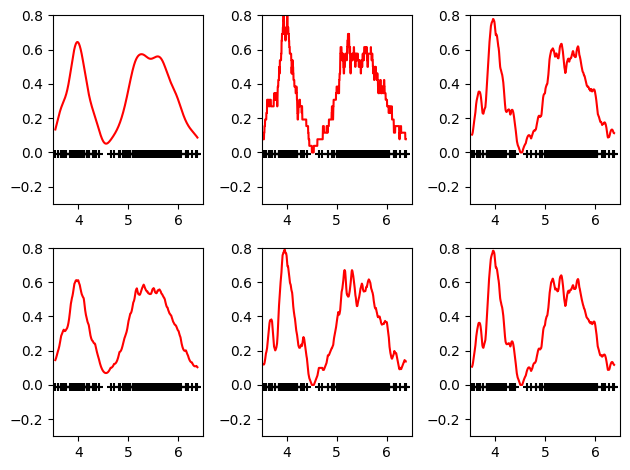

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=3)
names = ["gaussian","tophat","epanechnikov","exponential","linear","cosine"]
for i in range(len(names)):
  data = np.array(sample) # reshape z arrayem 
  kde = KernelDensity(bandwidth=0.1, kernel=names[i])
  kde.fit(data)
  x = np.linspace(data.min(), data.max(), 1000)[:, np.newaxis]
  log = kde.score_samples(x)
  val = np.exp(log)
  axes[i//3, i%3].plot(x, val, color='red')
  axes[i//3, i%3].scatter(sample, np.full_like(sample, -0.01), marker='+', color='black')
plt.setp(axes, xlim=(3.5, 6.5), ylim=(-0.3, 0.8))
plt.tight_layout()
plt.show()


fig, axes = plt.subplots(nrows=2, ncols=3)
names = ["gaussian","tophat","epanechnikov","exponential","linear","cosine"]
for i in range(len(names)):
  data = np.array(sample) # dane dwuwymiarowe
  print(np.array(sample))
  kde = KernelDensity(bandwidth=0.1, kernel=names[i])
  kde.fit(data)
  x = np.linspace(data.min(), data.max(), 1000)[:, np.newaxis]
  log_density = kde.score_samples(x) # logarytmiczne wartosci,  
  density = np.exp(log_density)
  axes[i//3, i%3].plot(x, density, color='red')
  axes[i//3, i%3].set_xlabel('x')
  axes[i//3,i%3].set_ylabel('Density')
  axes[i//3,i%3].set_title(names[i] + " kernel")
  axes[i//3,i%3].scatter(sample, np.full_like(sample, -0.1), marker="|", color='green')
plt.setp(axes,ylim=(-0.2,0.9),xlim=(3.2,6.6))
fig.suptitle("Estymacja rozkładu danych") # suptitle()
plt.legend()
plt.tight_layout()
plt.show()

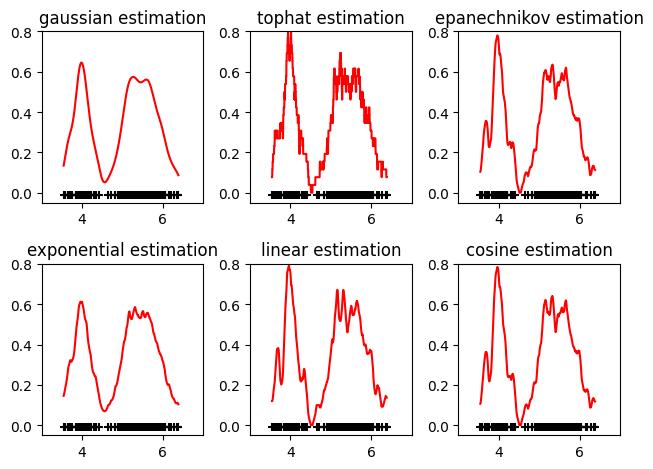

In [31]:


names = ["gaussian","tophat","epanechnikov","exponential","linear","cosine"]
fig, ax = plt.subplots(nrows=2, ncols=3)
for i, names in enumerate(names):
  data = np.array(sample)
  kde = KernelDensity(bandwidth = 0.1, kernel=names)
  kde.fit(data)
  sort = np.linspace(data.min(), data.max(), 1000)[:, np.newaxis]
  log = kde.score_samples(sort)
  exp = np.exp(log)
  ax[i//3, i%3].plot(sort, exp, color='red')
  ax[i//3, i%3].scatter(sample, np.full_like(sample, -0.01), marker='+', color='black')
  ax[i//3, i%3].set_title(f'{names} estimation')
plt.setp(ax, xlim=(3, 7), ylim=(-0.05, 0.8))
plt.tight_layout()
plt.show()



### Zadanie 3: Dyskusja wyników [6 pkt]

Przygotowane w poprzednich zadaniach wykresy są wizualną reprezentacją tego samego zestawu danych, dobór metody oraz jej parametrów sparawia jednak, że nie wyglądają one identycznie.

Przedyskutuj plusy i minusy obu metod oraz odpowiedz na pytanie w jaki sposób dobór parametrów funkcji (liczba, szerokość i położenie granic przedziałów, wykorzystana wersja oraz szerokość jadra) wpływa na poprawność i czytelność wyniku.

YOUR ANSWER HERE

### Zadanie 4: Estymacja na podstawie dystybuanty [8 pkt]

Przygotuj funkcję `cdf_estimation()`, która będzie dokonywała estymacji dystrybuanty rozkładu w oparciu o dystrybuantę empiryczną oraz statystykę wyznaczaną z rozkładu Kołmogorowa-Smirnowa zgodnie z informacjami zawartymi w docstring funkcji oraz schematem z załączonego do notatnika zestawu wzorów.

Poza zwracaniem danych określonych w docstring funkcji powinna ona generować wykres liniowy dystrybuanty empirycznej z zaznaczonym przedziałem ufności oraz tytułem figury `Przedział ufności dystrybuanty rozkładu na poziomie istotności 1-alpha=A`, gdzie wartość A jest uzupełnianie na podstawie wartości argumentu `alpha`.

Uwagi do wykonania zadania:
 - Wartości statystyki testowej oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.kstwo`.

In [7]:

from scipy.stats import kstwo
def cdf_estimation(data, alpha):
    sorted = np.sort(data['X'])
    n = len(data)
    empirical = np.arange(1, n + 1)/n
    F_d_min = np.maximum(empirical - kstwo.ppf(1 - alpha, n), 0) # Fl 
    F_d_max =  np.minimum(empirical + kstwo.ppf(1 - alpha, n), 1) # Fu
    df = pd.DataFrame({'X': sorted, 'F_d': empirical, 'F_d_min': F_d_min, 'F_d_max': F_d_max})
    plt.plot(sorted, empirical, color='blue')
    plt.fill_between(sorted, F_d_min, F_d_max, color='gray')
    #plt.scatter(data, np.full_like(data, -0.01), marker='+', color='red')
    plt.legend()
    plt.show()
    return df




from scipy.stats import kstwo
def cdf_estimation(data, alpha):
    sorted_data = np.sort(data['X'])
    sorted_data = sorted_data.ravel()
    n = len(data['X'])
    print(n)
    emp_cdf = np.arange(1, n+1)/n   # dystrybuanta empiryczna 
    Fl = np.maximum(0, emp_cdf - kstwo.ppf(1 - alpha, n))
    Fu = np.minimum(emp_cdf + kstwo.ppf(1 - alpha, n), 1 )
    cdf = pd.DataFrame({'X':sorted_data, 'F_d':emp_cdf, 'F_d_min': Fl,
        'F_d_max': Fu})
    plt.plot(sorted_data, emp_cdf, label="Dystrybuanta empiryczna")
    plt.fill_between(sorted_data, Fl, Fu, color='gray', alpha=0.5)
    plt.title(f'Przedział ufności dystrybuanty rozkładu na poziomie istotności $1-\\alpha={1-alpha}$')
    plt.legend()
    plt.show()
    return cdf




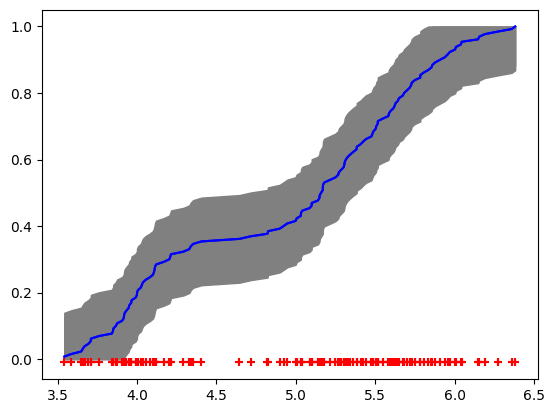

In [8]:
# Komórka testowa
test_results_3 = cdf_estimation(sample, 0.05)
assert type(test_results_3) == pd.DataFrame
assert test_results_3.shape == (130, 4)
assert list(test_results_3.columns) == ['X', 'F_d', 'F_d_min', 'F_d_max']
assert np.all(np.isclose(test_results_3.min().values, [3.54233698, 0.00769231, 0., 0.12544548]))
assert np.all(np.isclose(test_results_3.max().values, [6.38176057, 1., 0.88224683, 1.]))
assert np.all(np.isclose(test_results_3.mean().values, [4.9551826 , 0.50384615, 0.3925793 , 0.61420722]))

test_results_4 = cdf_estimation(sample, 0.02)
assert type(test_results_4) == pd.DataFrame
assert test_results_4.shape == (130, 4)
assert list(test_results_4.columns) == ['X', 'F_d', 'F_d_min', 'F_d_max']
assert np.all(np.isclose(test_results_4.min().values, [3.54233698, 0.00769231, 0., 0.13935689]))
assert np.all(np.isclose(test_results_4.max().values, [6.38176057, 1., 0.86833542, 1.]))
assert np.all(np.isclose(test_results_4.mean().values, [4.9551826 , 0.50384615, 0.380346, 0.62633351]))